# **MIS 311: INTRODUCTION TO BUSINESS ANALYTICS**
## Individual assignment: Portfolio Site
### **Topic: Supermarket Sale**

##### *Overview:* This analysis aims to explore the sales revenue of a supermarket, based on different brands, regions, and customer segments, along with a diverse range of products. Furthermore, the dataset clearly shows the quantity of items sold and the total revenue generated from those items.

In [74]:
# Import libraries
import pandas as pd
import numpy as np

In [15]:
np.nan

nan

In [16]:
pd.NA

<NA>

In [73]:
# Load data
supermarket_sale = pd.read_excel("/content/10 Supermarket Sale.xlsx")
supermarket_sale

,sale_id,branch,city,customer_type,product_name,product_category,quantity,total_price
0,1,A,New York,Member,Shampoo,Personal Care,3.0,17.66
1,2,B,Los Angeles,Normal,Notebook,Stationery,10.0,29.43
2,3,A,New York,Member,Apple,Fruits,15.0,19.26
3,4,A,Chicago,Normal,Detergent,Household,5.0,41.73
4,5,B,Los Angeles,Member,Orange Juice,Beverages,7.0,26.22
...,...,...,...,...,...,...,...,...
248,246,A,New York,Member,Notebook,Beverages,9.0,176.23
249,247,A,Chicago,Normal,Detergent,Beverages,3.0,28.28
250,248,A,New York,Member,Apple,Fruits,17.0,246.11
251,249,A,New York,Normal,Detergent,Personal Care,19.0,195.37


### **1. Checking Data Type**

In [18]:
supermarket_sale.dtypes

,0
sale_id,int64
branch,object
city,object
customer_type,object
product_name,object
product_category,object
quantity,float64
total_price,float64


### **2. Converting Data Type**

In [19]:
supermarket_sale["sale_id"] = pd.to_numeric(supermarket_sale.sale_id).astype(object)

In [20]:
supermarket_sale["quantity"] = pd.to_numeric(supermarket_sale.quantity, errors='coerce').fillna(0).astype(int)

In [21]:
supermarket_sale.dtypes

,0
sale_id,object
branch,object
city,object
customer_type,object
product_name,object
product_category,object
quantity,int64
total_price,float64


In [22]:
supermarket_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sale_id           253 non-null    object 
 1   branch            253 non-null    object 
 2   city              253 non-null    object 
 3   customer_type     250 non-null    object 
 4   product_name      253 non-null    object 
 5   product_category  247 non-null    object 
 6   quantity          253 non-null    int64  
 7   total_price       253 non-null    float64
dtypes: float64(1), int64(1), object(6)
memory usage: 15.9+ KB


### **3. Data Cleaning**

#### 3.1. Identify the missing value

In [23]:
supermarket_sale.isna()

,sale_id,branch,city,customer_type,product_name,product_category,quantity,total_price
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
248,False,False,False,False,False,False,False,False
249,False,False,False,False,False,False,False,False
250,False,False,False,False,False,False,False,False
251,False,False,False,False,False,False,False,False


In [43]:
# Return the missing values by column
supermarket_sale.isna().sum()

,0
sale_id,0
branch,0
city,0
customer_type,3
product_name,0
product_category,6
quantity,0
total_price,0


#### 3.2. Handling Missing Data

Use the `.dropna()` method to removes rows with missing data.

In [32]:
supermarket_sale.head(40)

,sale_id,branch,city,customer_type,product_name,product_category,quantity,total_price
0,1,A,New York,Member,Shampoo,Personal Care,3,17.66
1,2,B,Los Angeles,Normal,Notebook,Stationery,10,29.43
2,3,A,New York,Member,Apple,Fruits,15,19.26
3,4,A,Chicago,Normal,Detergent,Household,5,41.73
4,5,B,Los Angeles,Member,Orange Juice,Beverages,7,26.22
5,6,A,Chicago,Normal,Shampoo,Stationery,9,108.24
6,7,A,Chicago,Normal,Shampoo,Personal Care,1,11.46
7,8,B,Los Angeles,Normal,Shampoo,Household,9,175.55
8,9,A,Chicago,Member,Apple,Fruits,20,302.81
9,10,B,Los Angeles,Member,Shampoo,Fruits,19,374.48


In [48]:
# Drop all rows with NaN
df = supermarket_sale.dropna()
df

,sale_id,branch,city,customer_type,product_name,product_category,quantity,total_price
0,1,A,New York,Member,Shampoo,Personal Care,3,17.66
1,2,B,Los Angeles,Normal,Notebook,Stationery,10,29.43
2,3,A,New York,Member,Apple,Fruits,15,19.26
3,4,A,Chicago,Normal,Detergent,Household,5,41.73
4,5,B,Los Angeles,Member,Orange Juice,Beverages,7,26.22
...,...,...,...,...,...,...,...,...
248,246,A,New York,Member,Notebook,Beverages,9,176.23
249,247,A,Chicago,Normal,Detergent,Beverages,3,28.28
250,248,A,New York,Member,Apple,Fruits,17,246.11
251,249,A,New York,Normal,Detergent,Personal Care,19,195.37


In [79]:
# Save data to excel file for later uses
df.to_excel("/content/supermarket_sale_1.xlsx", index=False)

#### 3.3. Identifying Duplicate Rows

In [86]:
# Load data
df = pd.read_excel("/content/supermarket_sale_1.xlsx")
df

,sale_id,branch,city,customer_type,product_name,product_category,quantity,total_price
0,1,A,New York,Member,Shampoo,Personal Care,3,17.66
1,2,B,Los Angeles,Normal,Notebook,Stationery,10,29.43
2,3,A,New York,Member,Apple,Fruits,15,19.26
3,4,A,Chicago,Normal,Detergent,Household,5,41.73
4,5,B,Los Angeles,Member,Orange Juice,Beverages,7,26.22
...,...,...,...,...,...,...,...,...
236,246,A,New York,Member,Notebook,Beverages,9,176.23
237,247,A,Chicago,Normal,Detergent,Beverages,3,28.28
238,248,A,New York,Member,Apple,Fruits,17,246.11
239,249,A,New York,Normal,Detergent,Personal Care,19,195.37


In [87]:
# Check duplicate in the dataframe
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
236,False
237,False
238,False
239,False


In [88]:
df.duplicated().value_counts()

,count
False,241


### **4. Descriptive Statistic**

In [90]:
import matplotlib.pyplot as plt

In [91]:
# Load data
supermarket_sale_1 = pd.read_excel("/content/supermarket_sale_1.xlsx")
supermarket_sale_1.head()

,sale_id,branch,city,customer_type,product_name,product_category,quantity,total_price
0,1,A,New York,Member,Shampoo,Personal Care,3,17.66
1,2,B,Los Angeles,Normal,Notebook,Stationery,10,29.43
2,3,A,New York,Member,Apple,Fruits,15,19.26
3,4,A,Chicago,Normal,Detergent,Household,5,41.73
4,5,B,Los Angeles,Member,Orange Juice,Beverages,7,26.22


#### 4.1. The 1st insight: Find the product category with the highest total revenue.

In [99]:
# Calculate total revenue by product category
category_sales = supermarket_sale_1.groupby("product_category")["total_price"].sum().sort_values(ascending=False)
category_sales

,total_price
product_category,
Fruits,7450.12
Beverages,6463.17
Stationery,6255.25
Household,5704.90
Personal Care,4569.34


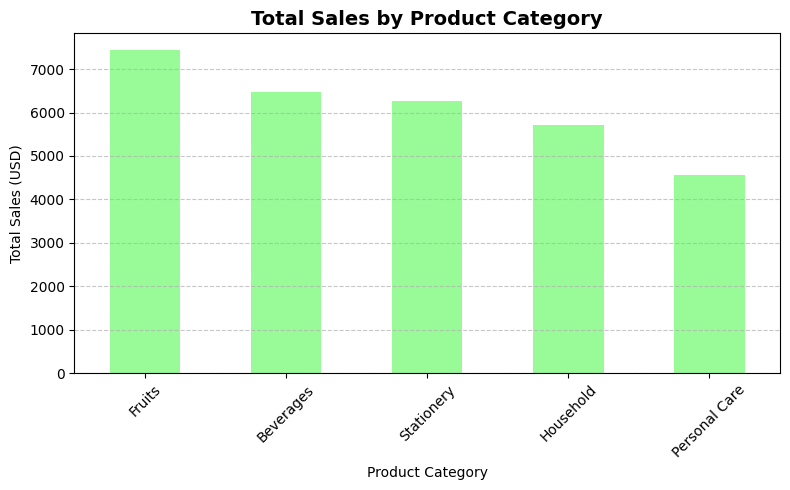

In [105]:
# Create a visualization for the 1st insight
plt.figure(figsize=(8,5))
category_sales.plot(kind='bar', color='palegreen')

plt.title("Total Sales by Product Category", fontsize=14, fontweight='bold')
plt.xlabel("Product Category")
plt.ylabel("Total Sales (USD)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### 4.2. The second insight: Find the city that generates the most profit.

In [107]:
# Calculate revenue by city
city_sales = supermarket_sale_1.groupby("city")["total_price"].sum().sort_values(ascending=False)
city_sales

,total_price
city,
Chicago,10873.69
New York,10633.78
Los Angeles,8935.31


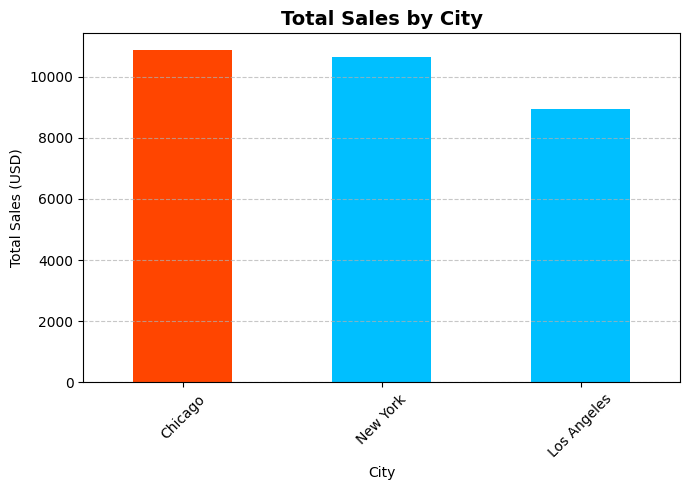

In [120]:
# Create a visualization for the 1st insight
plt.figure(figsize=(7,5))
colors = ['orangered' if c == 'Chicago' else 'deepskyblue' for c in city_sales.index]

city_sales.plot(kind='bar', color=colors)

plt.title("Total Sales by City", fontsize=14, fontweight='bold')
plt.xlabel("City")
plt.ylabel("Total Sales (USD)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()